In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\New York Crime.csv', dtype={'City':str})
print (df.head(7))
print (len(df))

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2013         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,861               0   
5           Addison Town and Village       2,577               3   
6                      Akron Village       2,846               3   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   
5    

In [4]:
# TO DO: cut first three lines. Replace nan with 0? Get rid of Unnamed 13. 

In [5]:
#Get rid of top three rows and last three
new_df = df.drop([0,1,2, 3, 354, 353, 352])

#assign row to column names
new_df.columns = df.iloc[3]
#Clean up column names so you can delete some useless columns that are just causing nan issues
new_df.columns = new_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\n', '_').str.replace('-', '')
#Get rid of empty rape column
#modcrime= new_df.drop(['Rape_revised_definition1'], axis = 'columns') CAN USE THIS TOO
modcrime= new_df.drop([new_df.columns[4], new_df.columns[13]], axis = 'columns')
print (modcrime.head(10))



3                       City Population Violent_crime  \
4              Adams Village      1,861             0   
5   Addison Town and Village      2,577             3   
6              Akron Village      2,846             3   
7                     Albany     97,956           791   
8             Albion Village      6,388            23   
9             Alfred Village      4,089             5   
10          Allegany Village      1,781             3   
11              Amherst Town    118,296           107   
12        Amityville Village      9,519             9   
13                 Amsterdam     18,182            30   

3  Murder_and_nonnegligent_manslaughter Rape_legacy_definition2 Robbery  \
4                                     0                       0       0   
5                                     0                       0       0   
6                                     0                       0       0   
7                                     8                      30     227 

In [6]:
[modcrime['City'].unique()]
print (len(modcrime))


348


In [25]:
#convert str to int

modcrime['PopNum'] = modcrime['Population'].str.replace(',', '')
modcrime['PropertyNum'] = modcrime['Property_crime'].str.replace(',', '')
modcrime['RobberyNum'] = modcrime['Robbery'].str.replace(',', '')
modcrime['Larceny']= modcrime['Larceny_theft'].str.replace(',', '')
modcrime['Burg']= modcrime['Burglary'].str.replace(',', '')
modcrime['Aggas']= modcrime['Aggravated_assault'].str.replace(',', '')
modcrime['Rape'] = modcrime['Rape_legacy_definition2'].str.replace(',', '')
print(modcrime['PopNum'])
print(modcrime['PropertyNum'])

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: object
4        12
5        24
6        16
7      4090
8       223
9        46
10       10
11     2118
12      2

In [26]:
modcrime.RobberyNum = pd.to_numeric(modcrime.RobberyNum, errors = 'coerce')
modcrime.PopNum = pd.to_numeric(modcrime.PopNum, errors='coerce')
modcrime.PropertyNum = pd.to_numeric(modcrime.PropertyNum, errors='coerce')
modcrime.Larceny = pd.to_numeric(modcrime.Larceny, errors='coerce')
modcrime.Burg = pd.to_numeric(modcrime.Burg, errors='coerce')
modcrime.Aggas = pd.to_numeric(modcrime.Aggas, errors='coerce')
modcrime.Rape = pd.to_numeric(modcrime.Rape, errors = 'coerce')
print (modcrime.PopNum)

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: int64


In [9]:
#convert str to int for murder
modcrime['Murder'] = pd.to_numeric(modcrime.Murder_and_nonnegligent_manslaughter, errors='coerce')
print (modcrime['Murder'])

4      0
5      0
6      0
7      8
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     3
27     0
28     0
29     0
30     0
31     0
32     0
33     0
      ..
322    0
323    0
324    0
325    7
326    0
327    1
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    0
341    0
342    1
343    0
344    1
345    0
346    0
347    0
348    0
349    0
350    6
351    0
Name: Murder, Length: 348, dtype: int64


In [10]:
#create features Popsquared
modcrime['Population Squared']= (modcrime['PopNum'])**2

In [11]:
#create features murder or none

modcrime['Murder0'] = (modcrime['Murder'] == 0)
modcrime['Murder1'] = (modcrime['Murder'] != 0)
print(modcrime['Murder0'].head(5))
print(modcrime['Murder1'].head(5))

4     True
5     True
6     True
7    False
8     True
Name: Murder0, dtype: bool
4    False
5    False
6    False
7     True
8    False
Name: Murder1, dtype: bool


In [37]:
#create features Robbery

modcrime['Robbery0'] = (modcrime['RobberyNum'] == 0)
modcrime['Robbery1'] = (modcrime['RobberyNum'] != 0)
modcrime['Burg0'] = (modcrime['Burg'] == 0)
modcrime['Burg1'] = (modcrime['Burg'] != 0 )
modcrime['Aggas0'] = (modcrime['Aggas'] == 0)
modcrime['Aggas1'] = (modcrime['Aggas']!=0)
modcrime['Rape0'] = (modcrime['Rape'] == 0)
modcrime['Rape1'] = (modcrime['Rape']!=0)
modcrime['Larceny0'] = (modcrime['Larceny'] == 0)
modcrime['Larceny1'] = (modcrime['Larceny']!=0)
print(modcrime['Robbery0'].head(5))
print(modcrime['Robbery1'].head(5))

4     True
5     True
6     True
7    False
8    False
Name: Robbery0, dtype: bool
4    False
5    False
6    False
7     True
8     True
Name: Robbery1, dtype: bool


In [38]:
corrmat = modcrime.corr()
    
    # Make the correlation matrix.

print(corrmat)


3                   PopNum  PropertyNum  RobberyNum  Larceny   Burg  Aggas  \
3                                                                            
PopNum               1.000        0.996       0.998    0.998  0.971  0.999   
PropertyNum          0.996        1.000       0.998    1.000  0.987  0.998   
RobberyNum           0.998        0.998       1.000    0.999  0.980  1.000   
Larceny              0.998        1.000       0.999    1.000  0.983  0.999   
Burg                 0.971        0.987       0.980    0.983  1.000  0.976   
Aggas                0.999        0.998       1.000    0.999  0.976  1.000   
Murder               0.987        0.995       0.993    0.993  0.994  0.991   
Population Squared   0.998        0.991       0.996    0.994  0.959  0.997   
Murder0             -0.162       -0.191      -0.166   -0.183 -0.241 -0.164   
Murder1              0.162        0.191       0.166    0.183  0.241  0.164   
Robbery0            -0.064       -0.079      -0.058   -0.077 -0.

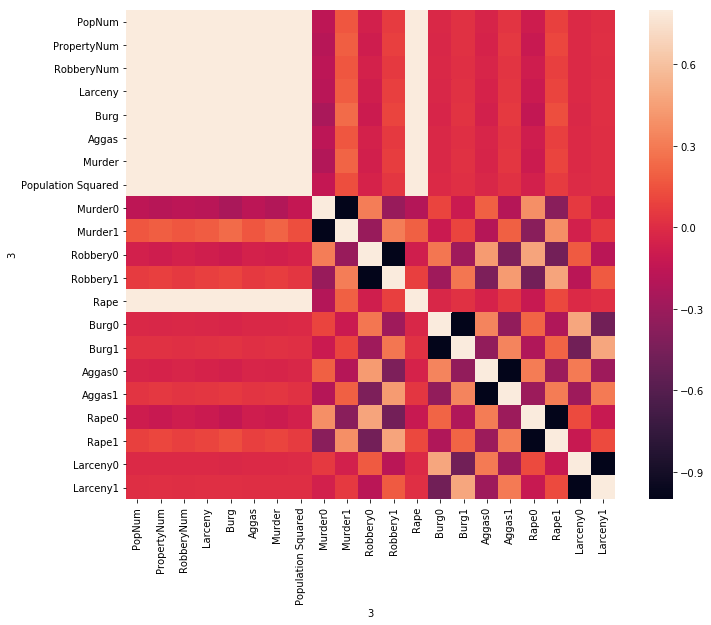

In [39]:
import seaborn as sns
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))


# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [47]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = modcrime['Aggas1'].values.reshape(-1, 1)
X = modcrime[['Murder1', 'Robbery1', 'Burg1', 'Larceny1', 'Rape1', 'Burg', 'Larceny', 'Murder', 'Rape']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.63795914e-02  2.29247888e-01  2.51663757e-01  4.34618007e-01
   7.16004003e-02  2.36571938e-04  4.20058605e-05 -9.44362366e-03
  -5.13963720e-03]]

Intercept: 
 [-0.03598576]

R-squared:
0.26641967233053265


In [55]:
data = modcrime [['Murder1', 'Robbery1', 'Burg1', 'Larceny1', 'Rape1', 'Burg', 'Larceny', 'Murder', 'Rape']]
target = modcrime.Aggas


In [82]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.11428571428571428
Testing on Sample: 0.21839080459770116


In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=.5)
fit = lr.fit(x_train, y_train)
print('Regression coefficients:', fit.coef_)
print('Regression intercept:', fit.intercept_)
print('Regression R2:', fit.score(x_train, y_train))

Regression coefficients: [[-1.42737396e-01 -3.58737384e-01 -9.50206810e-02  9.66722527e-02
   1.54598241e-01 -1.75779713e-01 -6.68539990e-03 -1.42797930e-01
   2.92101522e-01]
 [-2.02990763e-01  1.93290677e-01  1.22208953e-01 -2.35060652e-01
  -5.91072476e-01 -8.23285533e-02  4.83252291e-03 -2.03032779e-01
  -7.89066924e-01]
 [-2.62171656e-01  2.48424926e-01  2.55544720e-01 -5.54521724e-01
  -5.34250059e-01 -3.01896768e-02 -4.73802581e-04 -2.66193645e-01
  -1.58036446e-01]
 [ 5.53674966e-02  2.12643920e-01 -2.74097107e-01 -5.65494645e-01
  -1.83487985e-01  1.22551788e-02 -7.58433014e-03 -3.48620121e-02
  -1.36134636e-01]
 [ 6.99692113e-02  1.62055165e-01 -1.95256144e-01 -7.89646794e-01
   1.69215411e-01 -2.43351383e-02  1.01944207e-03  4.39814020e-02
  -2.40496832e-01]
 [-2.75619147e-01  5.20222591e-01 -3.20642091e-01 -8.48384719e-01
   7.06254351e-01  4.89005568e-03 -5.25460622e-03 -2.93061874e-01
  -3.11661807e-01]
 [ 1.65284779e-01  4.74108502e-02 -7.03467196e-01 -1.07771660e+00
   

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=.5)
fit = lr.fit(x_test, y_test)
print('Regression coefficients:', fit.coef_)
print('Regression intercept:', fit.intercept_)
print('Regression R2:', fit.score(x_test, y_test))

Regression coefficients: [[-5.74101873e-02 -1.79180102e-01  7.94213254e-02 -5.07748756e-01
   2.10737650e-01 -1.02844780e-01  3.70934185e-03 -5.74102202e-02
  -2.77296970e-02]
 [-1.90759842e-03  3.47035985e-01  5.06378282e-01  5.02076125e-02
  -1.41355151e-01 -1.22939604e-01 -2.71393375e-02 -1.90773027e-03
  -1.45033240e-01]
 [-2.61080642e-02  2.65071249e-03 -3.29838708e-01 -4.73286375e-02
  -2.89919790e-01 -1.94455398e-01  1.15581274e-02 -2.61082533e-02
  -3.77053350e-01]
 [-2.04878711e-02  4.61558979e-01 -1.39243836e-01 -7.06934088e-02
  -4.26964114e-02  1.08533081e-02 -2.26672632e-02 -2.04879515e-02
   1.79505200e-01]
 [-2.59909203e-02  2.51954220e-01 -2.75462927e-01 -5.21509695e-01
   3.17692107e-02  2.05022377e-02 -1.33031667e-02 -2.59916609e-02
  -2.12122350e-01]
 [-1.30925715e-02 -4.27482386e-01 -2.59256673e-01 -5.48550517e-01
   2.32678126e-01 -7.38768231e-02 -1.74127459e-03 -1.30926094e-02
   1.87132429e-01]
 [-3.88193672e-02 -2.00133228e-01 -3.61237238e-01 -5.99872621e-01
  -

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Why does this regression run multiple iterations?

In [80]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(x_train, y_train)
print('Ridge coefficients:', ridgeregr.coef_)
print('Ridge intercept:', ridgeregr.intercept_)
print('R2 for Ridge:', ridgeregr.score(x_train, y_train))

Ridge coefficients: [ 1.59799904e+01 -2.35225427e+00 -5.09351453e-01  8.31401235e-02
 -7.17364622e+00  2.43457266e-01  1.47534089e-03  4.59709447e-02
  5.87297955e+00]
Ridge intercept: 0.0
R2 for Ridge: 0.9413931018523302


In [78]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(x_test, y_test)
print('Ridge coefficients:', ridgeregr.coef_)
print('Ridge intercept:', ridgeregr.intercept_)
print('R2 for Ridge:', ridgeregr.score(x_test, y_test))

Ridge coefficients: [-23.49183593  -1.97700173   0.72817372   0.29637205  -8.23988941
  -0.9219816    0.17381501  61.01523723   5.5462316 ]
Ridge intercept: 0.0
R2 for Ridge: 0.9999229930072273


In [76]:
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(x_train, y_train)
print ('Lasso Coefficients:', lass.coef_)
print ('Lasso Intercept:', lass.intercept_)
print('R² for Lasso:')
print(lass.score(x_train, y_train))

Coefficients: [ 0.         -0.         -0.         -0.         -0.          0.32015079
  0.          0.          4.11549481]
Intercept: -2.756517731818768
R² for Lasso:
0.9378037159276694


In [88]:
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(x_test, y_test)
print ('Lasso Coefficients:', lass.coef_)
print ('Lasso Intercept:', lass.intercept_)
print('R2 for Lasso test:', lass.score(x_test, y_test))

Lasso Coefficients: [ -0.          -7.79621146  -0.          -0.         -20.03816186
  -0.15594012   0.34531498   9.37266143  -8.49271097]
Lasso Intercept: -39.34146503072901
R2 for Lasso test: 0.9994259922963313


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Instead of looking at Property Crime again, my target here was aggravated assault. I created new features that I thought would be predictors for this crime. Most were binary features of did this crime happen or not. Looking at the heat map, I took the features with the lower correlation values to use in the model and then selected for features that would improve the score of the model. The models score remained low for all feature combinations and adding and subtracting features (based on coefficient values) did not seem to have a substantial impact on the R2 value. My best guess as to why is because crimes tend to be highly correlated. Is it possible that this data set does not fit the criteria for modelling because of this?

In performing these regressions, the Lasso and Ridge regressions perform the best in terms of R2 value, but the R2 value seems overfit on the test groups. The R2 value increases for all three models on the test group compared to the training group which doesn't really make sense. Based on the definitions of these regressions, it would make the most sense to use the Ridge regression here since there are so many variables with close correlations. Perhaps this is the entire point of the assignment: to show that the initial model is not strong, but when you implement the Ridge Regression, it accounts for these correlations and improves the strength of the model.

As for regularization, this seems like an arbitrary way to slightly skew the model numbers. When changing the regularization paramenters, my R2 value seemed to have minimal change. As this seems to be the key way of evaluating the models, changing the regularization parameters doesn't seem to do much. It does however drastically change the coefficients which should have an effect on future predictions? I still don't have a solid understanding of how you choose a regularization parameter.

